# ME4 Machine Learning - Tutorial 4

In [1]:
import sys
# setting path
sys.path.append('..')

from helperlib import (
    mathfunctions as hmath, 
    arrayfunctions as harray) 

import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import seaborn as sns
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import PolynomialFeatures

np.random.seed(5)

# Don't show plots inline
%matplotlib agg

## 1. Scaling

In [2]:
df = pd.read_csv('tensile_strength.csv')
t = df['Temperature (deg C)']
s = df['Ultimate tensile strength (Pa)']

### 1.1. Scale Each Parameter. 

In [3]:
t_mean, t_std = np.mean(t), np.std(t)
s_mean, s_std = np.mean(s), np.std(s)

t_scale = (t - t_mean) / t_std
s_scale = (s - s_mean) / s_std


### 1.2. Plot scaled data.

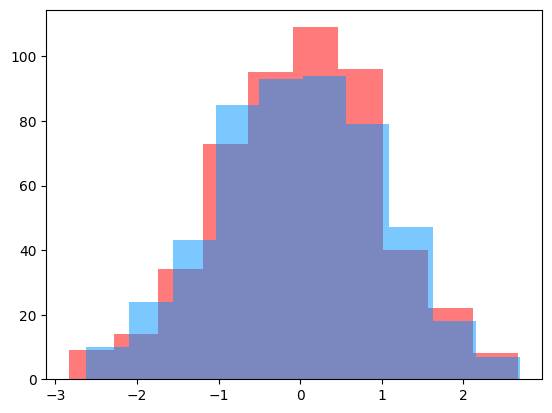

In [4]:
fig, ax = plt.subplots() 
plt.hist(s_scale, color='#FF000084')
plt.hist(t_scale, color='#0095FF84')
fig

### 1.3 Save the Scaling Paramters
In some cases, you may want to generate these scaling values from the training dataset then apply them to a test dataset in a different script. Therefore you need to save the scaling parameters.


In [5]:
scArray = np.array([[t_mean, s_mean], [t_std, s_std]])
np.savetxt('scaleParams.txt', scArray)

### 1.4. Load the scaled paramaters from a txt file.

In [6]:
[t_mean, s_mean], [t_std, s_std] = np.loadtxt('scaleParams.txt')
print(t_mean, s_mean, t_std, s_std)

200.6565792392117 251960970.64323512 9.800229629720286 29206384.770614292


## 2. Plotting linear discriminant functions

### 2.1 Define a discriminant function in 2D space 
$g(x) = w^t x + w_0$ using $w = (−1, −3)^t$ and $w_0= 1$. Plot this in a region $0 < x_1< 1$, $0 < x_2< 1$.

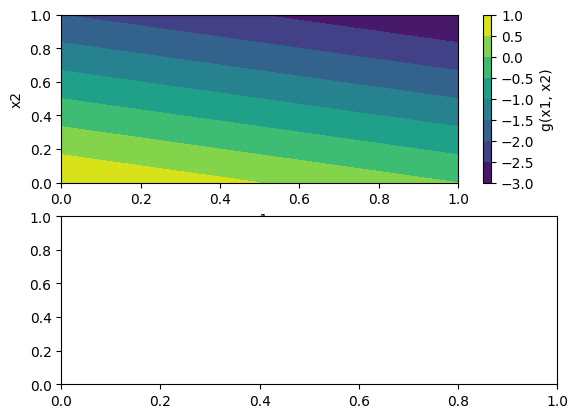

In [7]:
w = np.array([-1, -3]).transpose()
nx, ny = 100, 100
lim = (0, 1)
grid_points, x1_axis, x2_axis = harray.get_grid_points(nx, ny, lim)

g = np.matmul(grid_points, w) + 1
g_grid = np.reshape(g, (nx, ny))

fig, ax = plt.subplots(2)
ax[0].set_xlabel('x1')
ax[0].set_ylabel('x2')
CS = ax[0].contourf(x1_axis, x2_axis, g_grid)
cbar = fig.colorbar(CS)
cbar.ax.set_ylabel('g(x1, x2)')
fig

### 2.2. Calculate the line which corresponds to the discrimination line g(x) = 0
 plot this on the same graph – you should do this by hand and put the equation into Python rather than trying to use the code to perform the calculation.

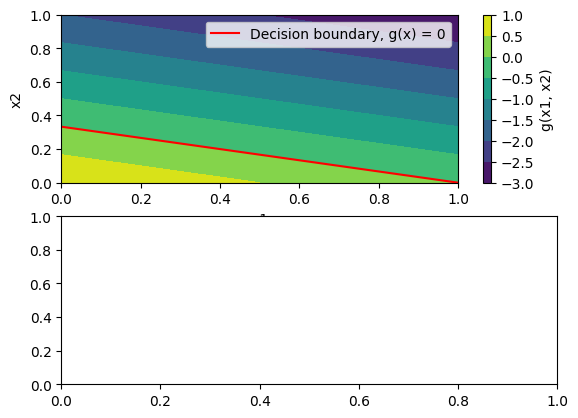

In [8]:
x1 = np.array([0, 1])
x2 = (1 / 3) * (1 - x1)
ax[0].plot(x1, x2, c='r', label='Decision boundary, g(x) = 0')
ax[0].legend()
fig

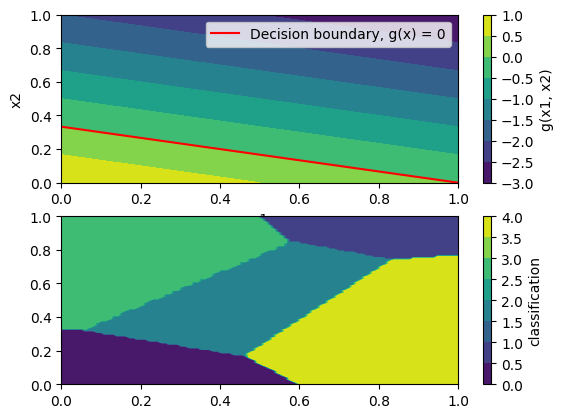

In [9]:
a1 = np.array([1.3, -1, -3])
a2 = np.array([-2, 1, 2])
a3 = np.array([0.3, 0.1, -0.1])
a4 = np.array([0, -1, 1])
a5 = np.array([-0.2, 1.5, -1])

a = np.array([a1, a2, a3, a4, a5]).T

nx, ny = 100, 100
lim = (0, 1)
x_grid, x1_axis, x2_axis = harray.get_grid_points(nx, ny, lim)
y_grid = np.concatenate([np.ones([nx * ny, 1]), x_grid], axis=1)

g_conc = np.matmul(y_grid, a).T

# g1, g2, g3, g4, g5 = g_conc

omega = np.argmax(g_conc, axis=0)

omega_grid = np.reshape(omega, [nx, ny])

CS2 = ax[1].contourf(x1_axis, x2_axis, omega_grid)
cbar = fig.colorbar(CS2)
cbar.ax.set_ylabel('classification')
fig
